#### Importing required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import animation, rc
from IPython.display import HTML
import pandas as pd
from matplotlib.animation import FuncAnimation

#setting up ffmpeg for the animations later on
plt.rcParams['animation.ffmpeg_path'] = 'C://FFmpeg//bin//ffmpeg.exe'

## 1.1 - Creating a dataset (Non-linearly Separable)

First, we create a toy problem to work with. Write a function to generate synthetic 2D 2-class data (i.e., $\mathbf{x} \in \mathbb{R}^2$ and $y \in \{-1,1\}$) such that: 
- $500$ observations are labelled $-1$ and $500$ observations are labelled $1$
- The observations from the class $-1$ are distributed as $\mathcal{N}(\mu_{-1}, \Sigma_{-1})$
- The observations from the class $1$ are distributed as $\mathcal{N}(\mu_{1}, \Sigma_{1})$

where $\mu_{-1} = (0,0)$, $\mu_1 = (1,1)$ and $
\Sigma_{-1} = \Sigma_{1} = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}.
$

**1) Generate this data set and plot the result (e.g., an $x_1$ by $x_2$ scatter plot, where each class is coded by a different color).**

(1000, 2)
(1000,)


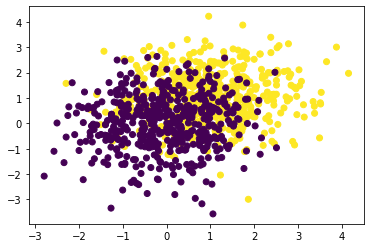

In [2]:
#Data params
std=[[1,0],[0,1]]
mean_P1=[1,1]
mean_M1=[0,0]
num=500
#Routine for generating the samples
def observations(mean, std, numbr):
    X = np.random.multivariate_normal(mean=mean,
                                     cov=std,
                                     size=numbr,
                                     check_valid='raise')
    return X

#Generating features for +1 and -1 labels
Xplus=observations(mean_P1, std, num)
Xminus=observations(mean_M1, std, num)
X=np.concatenate([Xplus, Xminus])

#Generating the labels (+1 & -1)
yplus=np.ones(num)
yminus=-yplus
y=np.concatenate([yplus, yminus])

#Sanity Checks:
#Checking the shapes (features and labels)
print(X.shape)
print(y.shape)

#Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
#Adding bias to the features
n=X.shape[0]
X1=np.ones((n,1)) #bias
X0=np.hstack([X,X1]) #Apending bias to the features

#Sigmoidal Activation function for computing the output and the accuracy
def accuracy(w):
    preds=1/(1+np.exp(-X0.dot(w))) #Sigmoidal Activation function
    preds[preds>=0.5]=1
    preds[preds<0.5]=-1
    correct=(preds==y)
    return correct.mean()

In [4]:
#Routines for plotting the scatterplot, hyperplane, and animation
def boundary(w,X):
    
    x1_min = np.min(X[:, 0])
    x1_max = np.max(X[:, 0])
    x2_min = np.min(X[:, 1])
    x2_max = np.max(X[:, 1]) 
    
    if w[1] != 0:
        x1 = np.array([x1_min, x1_max])
        x2 = -(w[0]*x1 + w[2])/w[1]
    else:
        X1 = -np.repeat(-w[2]/w[0], 2)
        x2 = np.array([x2_min, x2_max])
    return x1, x2


def plot_data_and_boundary(w):
    
    plt.scatter(X[:, 0], X[:, 1], c=y)
    x1, x2 = boundary(w,X)
    plt.plot(x1, x2, 'k-', lw=2)
    
def create_animation(weights, iter_step):
    
    n_iter = len(weights)

    # First create the figure, and instantiate the element we want to animate.
    fig, ax = plt.subplots()
    plt.scatter(X0[:, 0], X0[:, 1], c=y)
    bd, = ax.plot([], [], 'k-', lw=2)

    # animation function. This is called sequentially.
    def animate(i):
        x1, x2 = boundary(weights[i],X0)
        bd.set_data(x1, x2) 
        return (bd,)

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = FuncAnimation(fig, animate, frames=range(0, n_iter, iter_step), interval=50, blit=True)
    
    return anim

<a id='Perceptron'></a>


### 1.2 - Perceptron algorithm

**Implement the perceptron algorithm as seen in class. Stop after $10000$ iterations. As for the neural network, produce a .mp4 video showing the evolution of the decision boundary.**

weights_pct: [ 0.06857507  0.46068305 -3.02126202]
accuracy_pct: 0.5
n_updates: 118


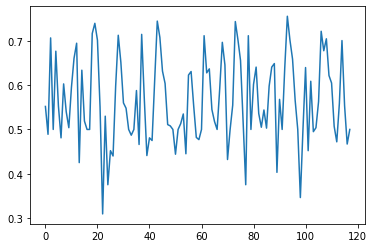

In [5]:
#Initializaing a random seed
np.random.seed(0)
n_iter=10000
w2 = np.random.normal(0, 1, size=3)
weights_updated=[]

#Perceptron algorithm
n_updates=0
for it in range(n_iter):
    i = it % n
    if y[i]*w2.dot(X0[i]) < 0:
        w2 = w2 + y[i] * X0[i] # learning rate is 1
        weights_updated.append(w2)
        n_updates += 1

print(f'weights_pct: {weights_updated[-1]}')
print(f'accuracy_pct: {accuracy(w2)}')
print(f'n_updates: {n_updates}')

plt.plot([accuracy(w2) for w2 in weights_updated])

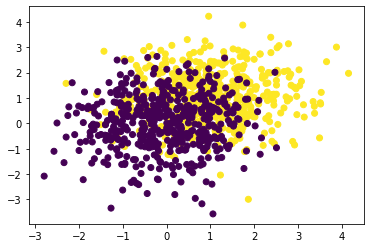

In [6]:
#Plotting Animation
anim = create_animation(weights_updated, 1)
# Show the animation in Jupyter
HTML(anim.to_jshtml())
# Save the animaiton as a mp4 video file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20)
anim.save('perceptron_nonlinearly_separable_dataset.mp4', writer=writer)

## 1.3 - Creating a dataset (linearly Separable)

First, we create a toy problem to work with. Write a function to generate synthetic 2D 2-class data (i.e., $\mathbf{x} \in \mathbb{R}^2$ and $y \in \{-1,1\}$) such that: 
- $500$ observations are labelled $-1$ and $500$ observations are labelled $1$
- The observations from the class $-1$ are distributed as $\mathcal{N}(\mu_{-1}, \Sigma_{-1})$
- The observations from the class $1$ are distributed as $\mathcal{N}(\mu_{1}, \Sigma_{1})$

where $\mu_{-1} = (-2,-2)$, $\mu_1 = (2,2)$ and $
\Sigma_{-1} = \Sigma_{1} = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}.
$

**1) Generate this data set and plot the result (e.g., an $x_1$ by $x_2$ scatter plot, where each class is coded by a different color).**

(1000, 2)
(1000,)


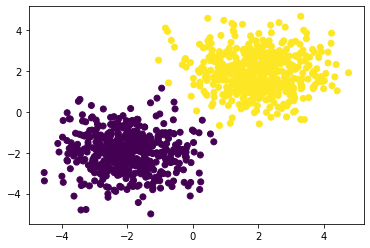

In [7]:
#Data params
std=[[1,0],[0,1]]
mean_P1=[2,2]
mean_M1=[-2,-2]
num=500

#Generating features for +1 and -1 labels
Xplus=observations(mean_P1, std, num)
Xminus=observations(mean_M1, std, num)
X=np.concatenate([Xplus, Xminus])

#Generating the labels (+1 & -1)
yplus=np.ones(num)
yminus=-yplus
y=np.concatenate([yplus, yminus])

#Sanity Checks:
#1.1 Checking the shapes (features and labels)
print(X.shape)
print(y.shape)

#1.2 Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
#Adding bias to the features
n=X.shape[0]
X1=np.ones((n,1)) #bias
X0=np.hstack([X,X1]) #Apending bias to the features

<a id='Perceptron'></a>


### 1.4 - Perceptron algorithm

**Implement the perceptron algorithm as seen in class. Stop after $10000$ iterations. As for the neural network, produce a .mp4 video showing the evolution of the decision boundary.**

weights_pct: [ 3.68592062  2.84956079 -0.02126202]
accuracy_pct: 1.0
n_updates: 5


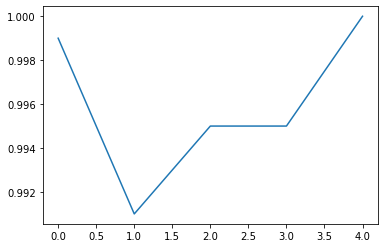

In [9]:
#Initializaing a random seed
np.random.seed(0)
n_iter=10000
w2 = np.random.normal(0, 1, size=3)
weights_updated=[]

#Perceptron algorithm
n_updates=0
for it in range(n_iter):
    i = it % n
    if y[i]*w2.dot(X0[i]) < 0:
        w2 = w2 + y[i] * X0[i] # learning rate is 1
        weights_updated.append(w2)
        n_updates += 1

print(f'weights_pct: {weights_updated[-1]}')
print(f'accuracy_pct: {accuracy(w2)}')
print(f'n_updates: {n_updates}')

plt.plot([accuracy(w2) for w2 in weights_updated])

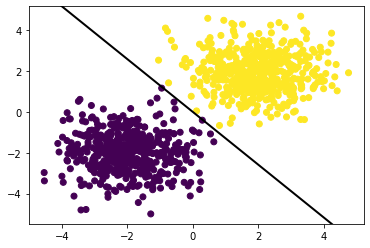

In [10]:
# END TO DO 
#####################
anim_pct = create_animation(weights_updated, 1)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20)
anim_pct.save('perceptron_linearly_separable_dataset.mp4', writer=writer)